In [1]:
!pip install tslearn
!pip install ta
!pip install plotly
!pip install dtaidistance

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np

from pylab import plot,show
from matplotlib import pyplot as plt
import plotly.express as px
import ta
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns

In [3]:
df = pd.read_csv("stock_details_5_years.csv")
print(df['Company'].unique().size)
df = df.groupby('Company').filter(lambda x: len(x) >= 720)
tickers = df['Company'].unique()
company_dfs = {}
for company in tickers:

  company_dfs[company] = df[df['Company'] == company]

491


In [4]:
print(len(company_dfs))

479


In [5]:
for company in company_dfs:
  company_dfs[company] = company_dfs[company].copy()
  company_dfs[company]['Percentage Change'] = company_dfs[company]['Close'].pct_change() * 100

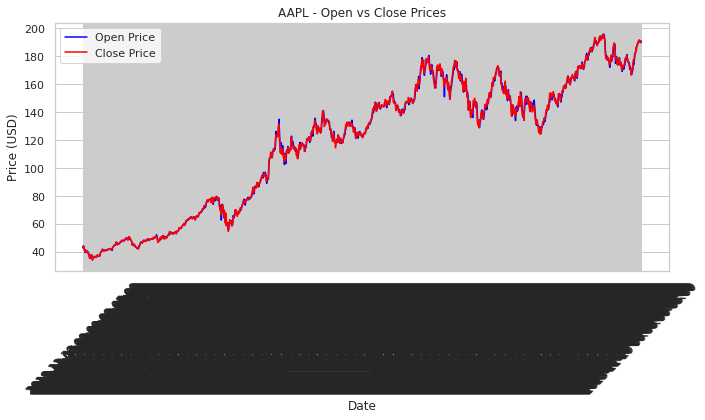

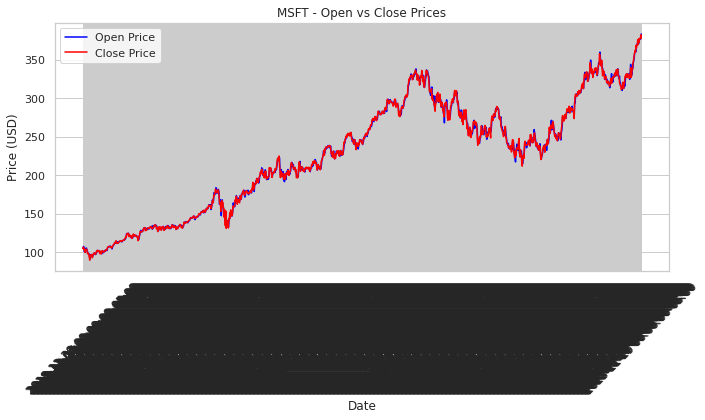

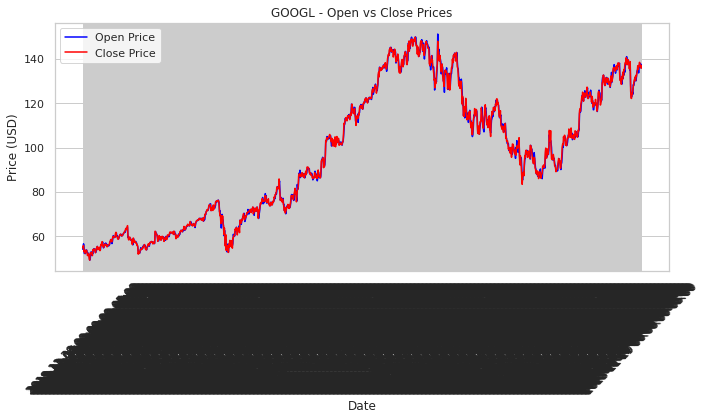

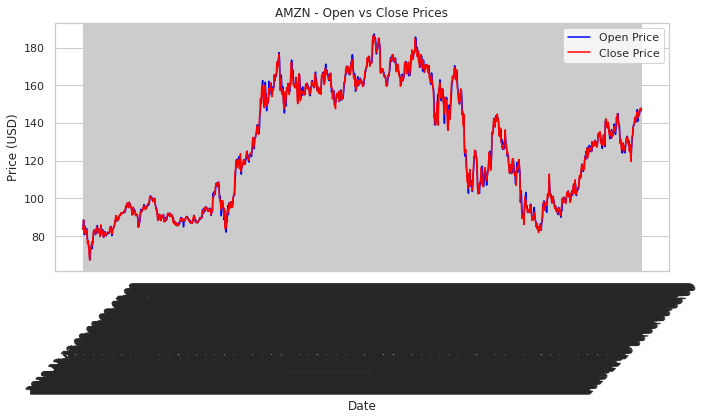

KeyboardInterrupt: 

In [33]:
selected_companies = list(company_dfs.keys())[:10]
for company in selected_companies:
    plt.figure(figsize=(10, 6))
    plt.plot(company_dfs[company]['Date'], company_dfs[company]['Open'], label='Open Price', color='blue')
    plt.plot(company_dfs[company]['Date'], company_dfs[company]['Close'], label='Close Price', color='red')
    plt.title(f'{company} - Open vs Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
def featureAddition(df):

  df['7DayMA'] = df['Percentage Change'].rolling(window=7).mean()
  df['30DayMA'] = df['Percentage Change'].rolling(window=30).mean()
  df['90DayMA'] = df['Percentage Change'].rolling(window=65).mean()
  df['7DayEMA'] = df['Percentage Change'].ewm(span=7, adjust=False).mean()
  df['30DayEMA'] = df['Percentage Change'].ewm(span=30, adjust=False).mean()
  df['90DayEMA'] = df['Percentage Change'].ewm(span=65, adjust=False).mean()
  df['1YrEMA'] = df['Percentage Change'].ewm(span=261, adjust=False).mean()
  df['3YrEMA'] = df['Percentage Change'].ewm(span=720, adjust=False).mean()
  df['VolatilityRatio'] = df['High']/df['Low']
  df['VolatilityRatio'] = df['VolatilityRatio'].rolling(window=30).mean()
  df['ROC30'] = df['Percentage Change'].rolling(window=30).sum()
  df['ADX'] = ta.trend.adx(high=df['High'], low=df['Low'], close=df['Close'], window=14)

for company in company_dfs:
  featureAddition(company_dfs[company])

In [7]:
print(len(company_dfs['AAPL']))

1258


In [8]:

company_time_series_data = {}

for company, df in company_dfs.items():
    # Specify the columns to drop if they exist in the dataframe
    columns_to_drop = ['Date',
                       'Dividends', 'Stock Splits', 'Company']

    # Drop only the columns that are present in the dataframe
    filtered_df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    
    
    # Extract the last 500 rows
    filtered_df = filtered_df.iloc[-500:]
    
    # Ensure there are no NaN values
    if not filtered_df.isna().any().any():
        scaler = StandardScaler()
        filtered_df = pd.DataFrame(scaler.fit_transform(filtered_df), columns=filtered_df.columns)
        # Convert to time series dataset format and store
        company_series = filtered_df.values
        company_time_series_data[company] = to_time_series_dataset([company_series])


AAPL: shape (1, 500, 17)
MSFT: shape (1, 500, 17)
GOOGL: shape (1, 500, 17)
AMZN: shape (1, 500, 17)
NVDA: shape (1, 500, 17)
META: shape (1, 500, 17)
TSLA: shape (1, 500, 17)
LLY: shape (1, 500, 17)
V: shape (1, 500, 17)
TSM: shape (1, 500, 17)
UNH: shape (1, 500, 17)
AVGO: shape (1, 500, 17)
NVO: shape (1, 500, 17)
JPM: shape (1, 500, 17)
WMT: shape (1, 500, 17)
XOM: shape (1, 500, 17)
MA: shape (1, 500, 17)
JNJ: shape (1, 500, 17)
PG: shape (1, 500, 17)
ORCL: shape (1, 500, 17)
HD: shape (1, 500, 17)
ADBE: shape (1, 500, 17)
ASML: shape (1, 500, 17)
CVX: shape (1, 500, 17)
COST: shape (1, 500, 17)
TM: shape (1, 500, 17)
MRK: shape (1, 500, 17)
KO: shape (1, 500, 17)
ABBV: shape (1, 500, 17)
BAC: shape (1, 500, 17)
PEP: shape (1, 500, 17)
FMX: shape (1, 500, 17)
CRM: shape (1, 500, 17)
SHEL: shape (1, 500, 17)
ACN: shape (1, 500, 17)
NFLX: shape (1, 500, 17)
MCD: shape (1, 500, 17)
AMD: shape (1, 500, 17)
LIN: shape (1, 500, 17)
NVS: shape (1, 500, 17)
AZN: shape (1, 500, 17)
CSCO: s

In [9]:
print(company_time_series_data['AAPL'])

[[[ 0.02727026 -0.03030791 -0.12228698 ... -0.55743002  0.72701837
    0.29399582]
  [ 0.04310317  0.14355419  0.14178064 ... -0.49527359  1.01274448
    0.30168929]
  [ 0.32404609  0.36386324  0.37689674 ... -0.4555046   1.3944145
    0.36825227]
  ...
  [ 1.6736178   1.63024935  1.69251689 ... -1.38270314  0.49963491
    0.44713726]
  [ 1.66531279  1.654941    1.72180277 ... -1.41331503  0.54167016
    0.49102221]
  [ 1.73175285  1.71576591  1.74933158 ... -1.46182703  0.60652109
    0.55923067]]]


In [10]:
X = np.array([np.array(series) for series in company_time_series_data.values()])
company_names = np.array(list(company_time_series_data.keys()))
X = np.squeeze(X)
print(X.shape)

(479, 500, 17)


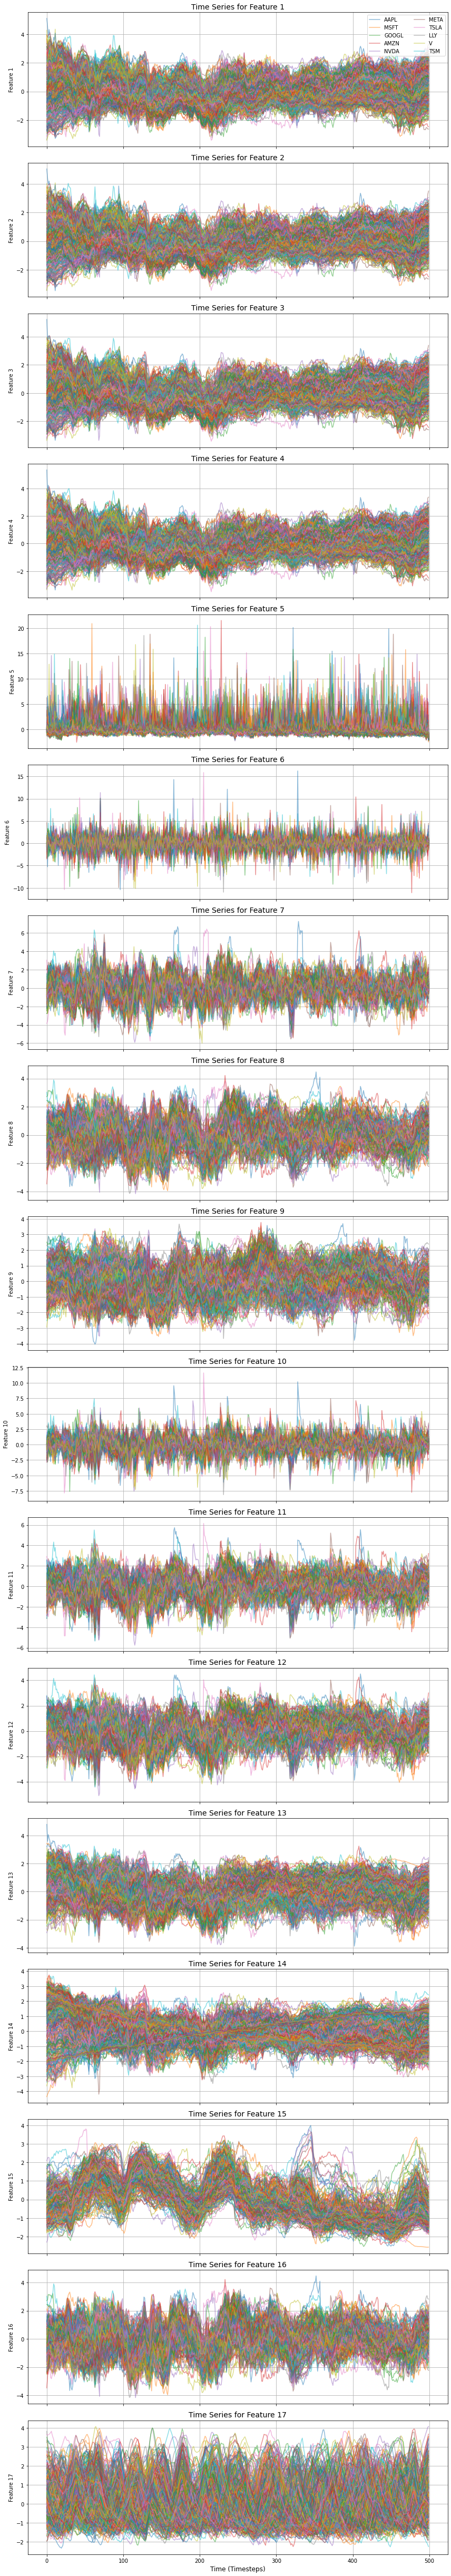

In [11]:
feature_names = [f"Feature {i+1}" for i in range(X.shape[2])]

# Plot settings
num_features = X.shape[2]
num_timesteps = X.shape[1]
num_companies = X.shape[0]

fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(12, 4 * num_features), sharex=True)

# If there's only one feature, make axes iterable
if num_features == 1:
    axes = [axes]

for feature_idx, ax in enumerate(axes):
    ax.set_title(f"Time Series for {feature_names[feature_idx]}", fontsize=14)
    ax.set_ylabel(feature_names[feature_idx])
    
    # Plot each company's time series for this feature
    for company_idx in range(num_companies):
        ax.plot(
            range(num_timesteps),
            X[company_idx, :, feature_idx],
            label=company_names[company_idx] if feature_idx == 0 else "",
            alpha=0.5  # Add transparency for better overlap visualization
        )

    ax.grid(True)

# Add legend for the first subplot
axes[0].legend(
    company_names[:10],  # Limit the number of legend entries for clarity
    loc='upper right', 
    fontsize=10,
    ncol=2
)

plt.xlabel("Time (Timesteps)", fontsize=12)
plt.tight_layout()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 479 out of 479 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1437 out of 1437 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1437 out of 1437 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1437 out of 1437 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


6240.394 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


3824.190 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


3790.303 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


3772.782 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


3765.327 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


3756.675 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


3749.755 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


3746.606 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.7s finished


3744.722 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.7s finished


3744.072 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


3744.072 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    8.6s finished


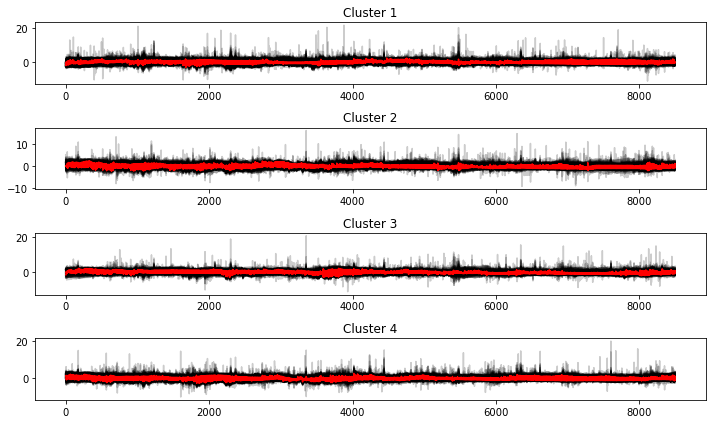

In [12]:

# Step 2: Apply DTW-based K-means clustering
# Choose the number of clusters based on your use case; for example, k=3
n_clusters = 4
scaler = TimeSeriesScalerMeanVariance()
normalized_data = scaler.fit_transform(X)
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=42)
labels = model.fit_predict(normalized_data)

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 6))
for yi in range(n_clusters):
    plt.subplot(4, 1, yi + 1)
    for xx in normalized_data[labels == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-")
    plt.title(f"Cluster {yi+1}")
plt.tight_layout()
plt.show()

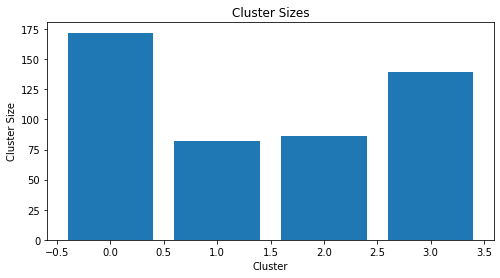

In [14]:
plt.figure(figsize=(8, 4))
plt.bar(range(n_clusters), [np.sum(labels == i) for i in range(n_clusters)])
plt.xlabel("Cluster")
plt.ylabel("Cluster Size")
plt.title("Cluster Sizes")
plt.show()


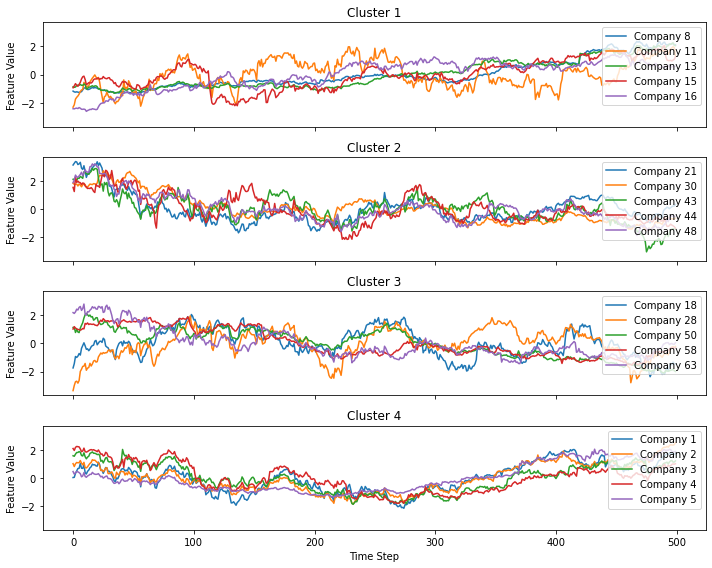

In [15]:
fig, axes = plt.subplots(n_clusters, 1, figsize=(10, 8), sharex=True, sharey=True)

# Loop through each cluster and plot the time series for companies in that cluster
for cluster in range(n_clusters):
    cluster_indices = np.where(labels == cluster)[0]
    
    # Pick the first few companies in the cluster to visualize
    for i in range(min(5, len(cluster_indices))):  # Visualize 5 companies from each cluster
        company_idx = cluster_indices[i]
        # Plot the time series of the first feature (e.g., 'Open')
        axes[cluster].plot(X[company_idx, :, 0], label=f"Company {company_idx + 1}")
        
    axes[cluster].set_title(f"Cluster {cluster + 1}")
    axes[cluster].legend(loc="upper right")
    axes[cluster].set_ylabel("Feature Value")
    
axes[-1].set_xlabel("Time Step")
plt.tight_layout()
plt.show()

In [16]:


from dtaidistance import dtw

distance_matrices = [
    dtw.distance_matrix_fast(normalized_data[:, :, i]) 
    for i in range(normalized_data.shape[-1])
]

# Combine results, e.g., by averaging the distance matrices
distance_matrix_combined = sum(distance_matrices) / len(distance_matrices)




DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding 

In [18]:
score = silhouette_score(distance_matrix_combined, labels, metric="precomputed")
print(f'Silhouette Score: {score}')

Silhouette Score: 0.079777174946915


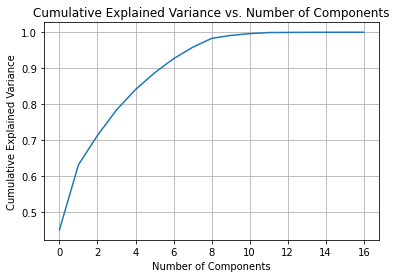

In [19]:
X_reshaped = X.reshape(-1, X.shape[-1]) 
scaler = StandardScaler()
X_std = scaler.fit_transform(X_reshaped)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [20]:
X_transformed = []


for i in range(X.shape[0]):
    company_data = X[i] 
    
    scaler = StandardScaler()
    company_data_std = scaler.fit_transform(company_data) 
    
    # Apply PCA to reduce to 9 components
    pca = PCA(n_components=5)
    company_data_pca = pca.fit_transform(company_data_std)

    X_transformed.append(company_data_pca)

X_transformed = np.array(X_transformed)

print(X_transformed.shape)

(479, 500, 5)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 479 out of 479 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1437 out of 1437 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1437 out of 1437 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1437 out of 1437 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


2775.724 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1637.985 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1604.558 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1587.437 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1576.187 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1574.319 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1573.406 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1572.276 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1568.299 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1567.889 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.7s finished


1567.365 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


1567.365 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1916 out of 1916 | elapsed:    4.6s finished


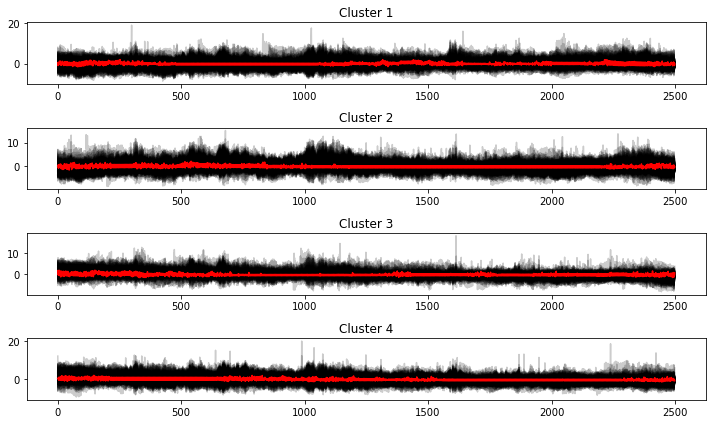

In [24]:
n_clusters = 4
scaler = TimeSeriesScalerMeanVariance()
normalized_data_pca = scaler.fit_transform(X_transformed)
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=42)
labels = model.fit_predict(normalized_data_pca)

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 6))
for yi in range(n_clusters):
    plt.subplot(4, 1, yi + 1)
    for xx in X_transformed[labels == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-")
    plt.title(f"Cluster {yi+1}")
plt.tight_layout()
plt.show()

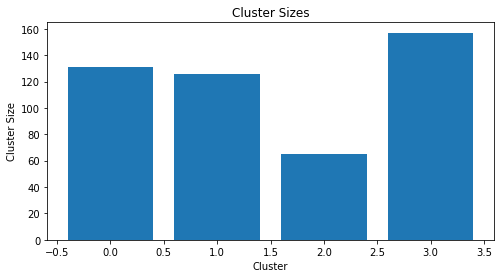

In [25]:
plt.figure(figsize=(8, 4))
plt.bar(range(n_clusters), [np.sum(labels == i) for i in range(n_clusters)])
plt.xlabel("Cluster")
plt.ylabel("Cluster Size")
plt.title("Cluster Sizes")
plt.show()

In [26]:
from dtaidistance import dtw

distance_matrices = [
    dtw.distance_matrix_fast(normalized_data_pca[:, :, i]) 
    for i in range(normalized_data_pca.shape[-1])
]

# Combine results, e.g., by averaging the distance matrices
distance_matrix_combined = sum(distance_matrices) / len(distance_matrices)
score = silhouette_score(distance_matrix_combined, labels, metric="precomputed")
print(f'Silhouette Score: {score}')

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


Silhouette Score: 0.02732703962543153


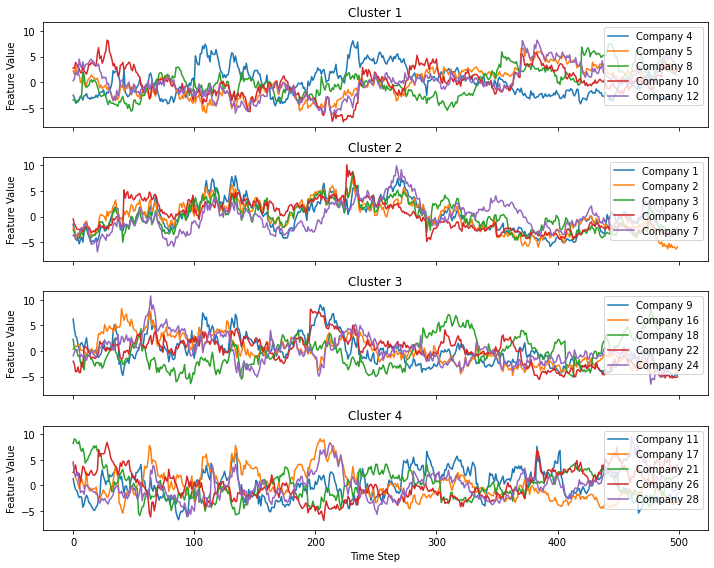

In [27]:
fig, axes = plt.subplots(n_clusters, 1, figsize=(10, 8), sharex=True, sharey=True)

# Loop through each cluster and plot the time series for companies in that cluster
for cluster in range(n_clusters):
    cluster_indices = np.where(labels == cluster)[0]
    
    # Pick the first few companies in the cluster to visualize
    for i in range(min(5, len(cluster_indices))):  # Visualize 5 companies from each cluster
        company_idx = cluster_indices[i]
        # Plot the time series of the first feature (e.g., 'Open')
        axes[cluster].plot(X_transformed[company_idx, :, 0], label=f"Company {company_idx + 1}")
        
    axes[cluster].set_title(f"Cluster {cluster + 1}")
    axes[cluster].legend(loc="upper right")
    axes[cluster].set_ylabel("Feature Value")
    
axes[-1].set_xlabel("Time Step")
plt.tight_layout()
plt.show()

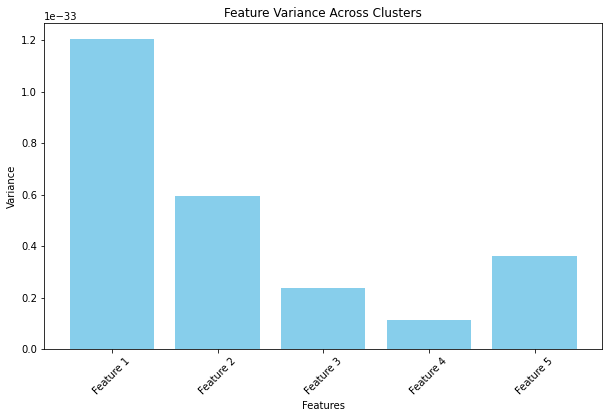

In [28]:
num_features = 5
num_clusters = 4
num_features = X_transformed.shape[2]
feature_means = np.zeros((num_clusters, num_features))
for cluster_id in range(num_clusters):
    cluster_data = X_transformed[labels == cluster_id]
    feature_means[cluster_id] = np.mean(cluster_data, axis=(0, 1))  # Mean over time and samples

feature_variance = np.var(feature_means, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(num_features), feature_variance, color='skyblue')
plt.title('Feature Variance Across Clusters')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(range(num_features), [f'Feature {i+1}' for i in range(num_features)], rotation=45)
plt.show()

In [29]:
from tslearn.preprocessing import TimeSeriesResampler
from tslearn.clustering import KernelKMeans

X_train = TimeSeriesResampler(sz=50).fit_transform(X)

# Normalization
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Clustering algorithms
clustering_algorithms = {
    "KMeans (Euclidean)": TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10, n_init=2),
    "DTW": TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=5, n_init=2),
    "SoftDTW": TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", max_iter=5, n_init=2),

    "KernelKMeans": KernelKMeans(n_clusters=n_clusters, kernel="gak", max_iter=5, n_init=2),
}

best_algorithm = None
best_score = float("-inf")

# Iterate through each clustering algorithm
for algorithm_name, algorithm in clustering_algorithms.items():
    # Apply the current clustering algorithm
    y_pred = algorithm.fit_predict(X_train)
    
    # For clustering evaluation, use Adjusted Rand Index (ARI) as a replacement for Silhouette Score
    # Note: You can compare y_pred with true labels (y_train), but if no ground truth is available, 
    # you could skip ARI and focus on inertia instead.
    
    score = algorithm.inertia_
    print(f"{algorithm_name} - Inertia: {score}")

KMeans (Euclidean) - Inertia: 483.7196148833381
DTW - Inertia: 431.2684335116955
SoftDTW - Inertia: 187508.3240856846
KernelKMeans - Inertia: 949.9999999999999


In [ ]:
X_train = TimeSeriesResampler(sz=50).fit_transform(X_transformed)

# Normalization
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Clustering algorithms
clustering_algorithms = {
    "KMeans (Euclidean)": TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10, n_init=2),
    "DTW": TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=5, n_init=2),
    "SoftDTW": TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", max_iter=5, n_init=2),

    "KernelKMeans": KernelKMeans(n_clusters=n_clusters, kernel="gak", max_iter=5, n_init=2),
}

best_algorithm = None
best_score = float("-inf")

# Iterate through each clustering algorithm
for algorithm_name, algorithm in clustering_algorithms.items():
    # Apply the current clustering algorithm
    y_pred = algorithm.fit_predict(X_train)
    
    # For clustering evaluation, use Adjusted Rand Index (ARI) as a replacement for Silhouette Score
    # Note: You can compare y_pred with true labels (y_train), but if no ground truth is available, 
    # you could skip ARI and focus on inertia instead.
    
    score = algorithm.inertia_
    print(f"{algorithm_name} - Inertia: {score}")